In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df = pd.read_csv('data/loan_approval_dataset.csv')

df.info()
df.columns = df.columns.str.strip()
df = df.drop('loan_id', axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB
<class 'pandas.

In [3]:
#Using replace as we are working a very simple data set that is already clean and doesn't have null/na values
df['education'] = df['education'].replace({' Graduate': 1, ' Not Graduate': 0})
df['self_employed'] = df['self_employed'].replace({' Yes': 1, ' No': 0})
df['loan_status'] = df['loan_status'].replace({' Approved': 1, ' Rejected': 0})

/var/folders/t_/vh98658s2rx110j19hbd4vqc0000gn/T/ipykernel_40155/32797127.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['education'] = df['education'].replace({' Graduate': 1, ' Not Graduate': 0})
/var/folders/t_/vh98658s2rx110j19hbd4vqc0000gn/T/ipykernel_40155/32797127.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['self_employed'] = df['self_employed'].replace({' Yes': 1, ' No': 0})
/var/folders/t_/vh98658s2rx110j19hbd4vqc0000gn/T/ipykernel_40155/32797127.py:4: FutureWarning: Downcasting behavior in `replace` is

In [4]:
X = df.drop('loan_status', axis=1)
y = df['loan_status']

print(X)

      no_of_dependents  education  self_employed  income_annum  loan_amount  \
0                    2          1              0       9600000     29900000   
1                    0          0              1       4100000     12200000   
2                    3          1              0       9100000     29700000   
3                    3          1              0       8200000     30700000   
4                    5          0              1       9800000     24200000   
...                ...        ...            ...           ...          ...   
4264                 5          1              1       1000000      2300000   
4265                 0          0              1       3300000     11300000   
4266                 2          0              0       6500000     23900000   
4267                 1          0              0       4100000     12800000   
4268                 1          1              0       9200000     29700000   

      loan_term  cibil_score  residential_assets_va

In [5]:
import joblib

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       323
           1       0.98      0.99      0.99       531

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



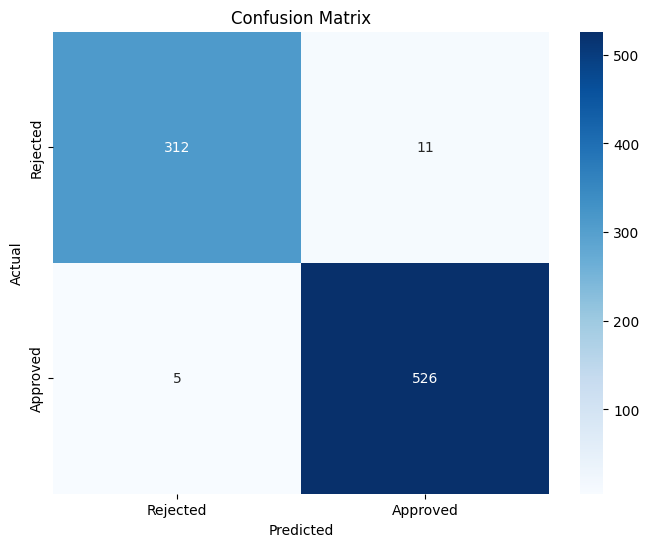

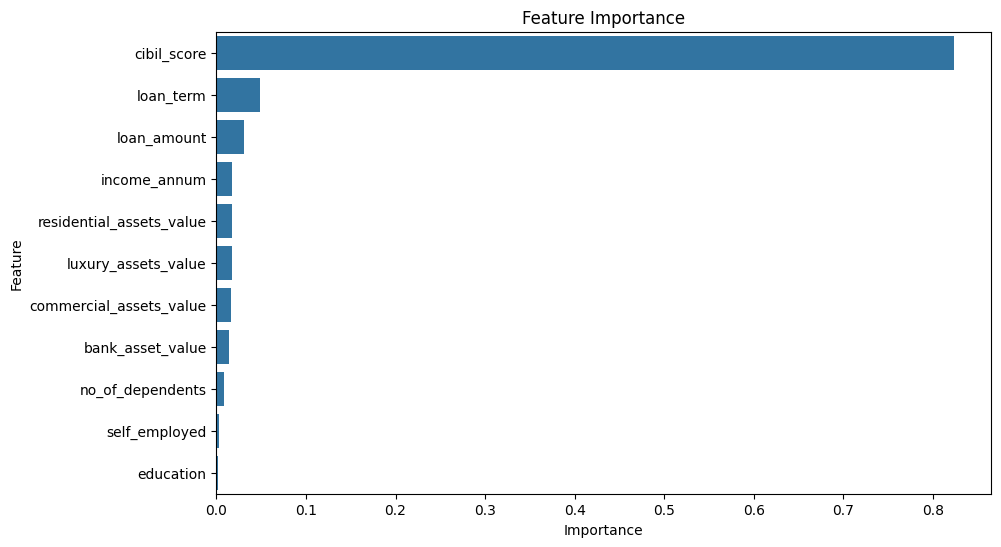

In [7]:
model = RandomForestClassifier(random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)

joblib.dump(model, 'models/RandomForest_model.joblib')

print("Classification Report:")
print(classification_report(y_test, y_pred))

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Rejected', 'Approved'], yticklabels=['Rejected', 'Approved'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.savefig('visuals/ran_for_matrix.png')

feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.savefig('visuals/feature_importance.png')


----------------- BONUS Logistic Regression VS Decision Trees ----------------------------------

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

Logistic Regression

In [9]:
# We need to scale the dataset for logistic regression
scaler = StandardScaler() 

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg_model = LogisticRegression(random_state=42, class_weight='balanced')

log_reg_model.fit(X_train_scaled, y_train)
y_pred_log_reg = log_reg_model.predict(X_test_scaled)



print("Classification Report:")
print(classification_report(y_test, y_pred_log_reg))

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.90       323
           1       0.96      0.92      0.94       531

    accuracy                           0.92       854
   macro avg       0.92      0.92      0.92       854
weighted avg       0.93      0.92      0.92       854



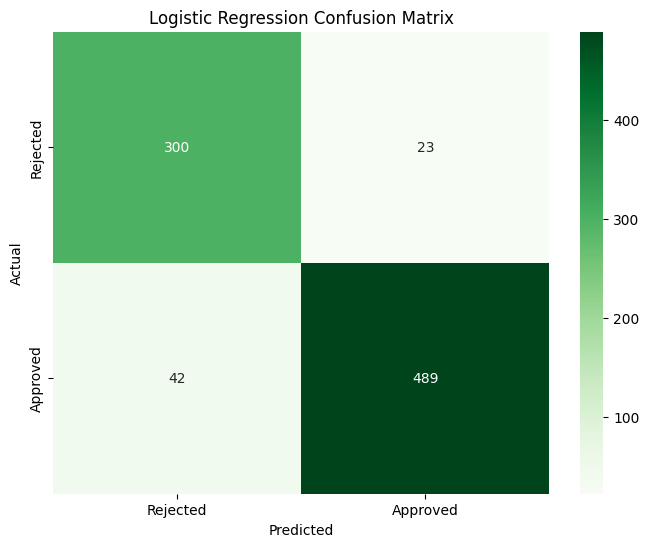

In [13]:
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_log_reg, annot=True, fmt='d', cmap='Greens', xticklabels=['Rejected', 'Approved'], yticklabels=['Rejected', 'Approved'])
plt.title('Logistic Regression Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.savefig('visuals/log_reg_matrix.png')

Decision Tree

In [14]:
tree_model = DecisionTreeClassifier(random_state=42, class_weight='balanced')

tree_model.fit(X_train, y_train)

y_pred_tree = tree_model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred_tree))

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       323
           1       0.98      0.98      0.98       531

    accuracy                           0.98       854
   macro avg       0.98      0.97      0.98       854
weighted avg       0.98      0.98      0.98       854



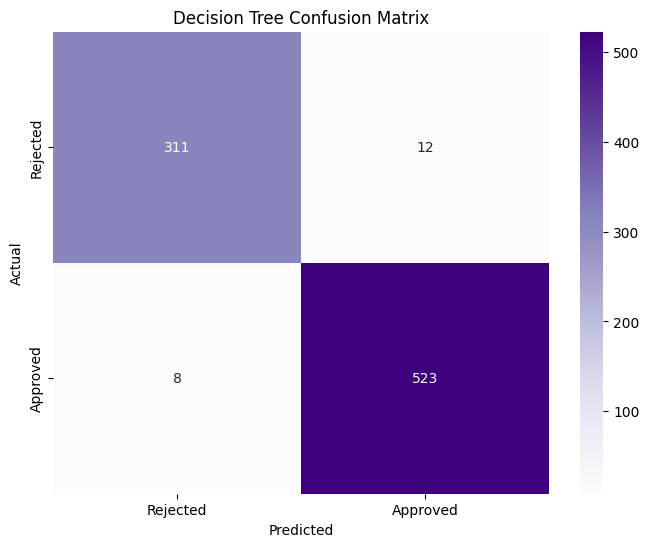

In [15]:
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_tree, annot=True, fmt='d', cmap='Purples', xticklabels=['Rejected', 'Approved'], yticklabels=['Rejected', 'Approved'])
plt.title('Decision Tree Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.savefig('visuals/decision_tree_matrix.png')

In [16]:
joblib.dump(scaler, 'models/scaler.joblib')
joblib.dump(log_reg_model, 'models/logistic_regression_model.joblib')
joblib.dump(tree_model, 'models/decision_tree_model.joblib')

['models/decision_tree_model.joblib']